## Importing Libraries

In [1]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [4]:
train=pd.read_csv(r"C:\Users\prasanna\Desktop\NLP with disaster\train.csv")

In [5]:
train.shape

(7613, 5)

In [6]:
test=pd.read_csv(r"C:\Users\prasanna\Desktop\NLP with disaster\test.csv")

In [7]:
test.shape

(3263, 4)

In [8]:
train.head(100)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## EDA

### Missing Values

In [9]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Exploring the target column

In [11]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

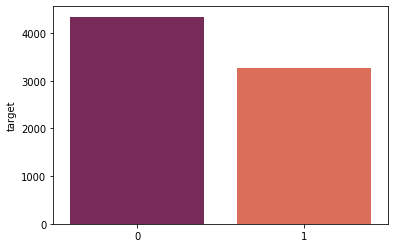

In [12]:
sns.barplot(train['target'].value_counts().index,train['target'].value_counts(),palette='rocket')

## Lets have a quick look how non disaster tweet look like 

In [13]:

for i in range(10):
    res=train[train['target']==0]['text'].values[i] 
    print(res)

What's up man?
I love fruits
Summer is lovely
My car is so fast
What a goooooooaaaaaal!!!!!!
this is ridiculous....
London is cool ;)
Love skiing
What a wonderful day!
LOOOOOOL


## Lets have a quick look how disaster tweet look like 

In [14]:
#lets have a quick look on how disaster tweet look like 
for i in range(100):
    res=train[train['target']==1]['text'].values[i] 
    print(i+1,".",res)


1 . Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
2 . Forest fire near La Ronge Sask. Canada
3 . All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
4 . 13,000 people receive #wildfires evacuation orders in California 
5 . Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
6 . #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
7 . #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
8 . I'm on top of the hill and I can see a fire in the woods...
9 . There's an emergency evacuation happening now in the building across the street
10 . I'm afraid that the tornado is coming to our area...
11 . Three people died from the heat wave so far
12 . Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I G

In [15]:
pd.DataFrame(train['keyword'].value_counts()[:20])

,keyword
fatalities,45
deluge,42
armageddon,42
damage,41
sinking,41
body%20bags,41
harm,41
twister,40
fear,40
collided,40


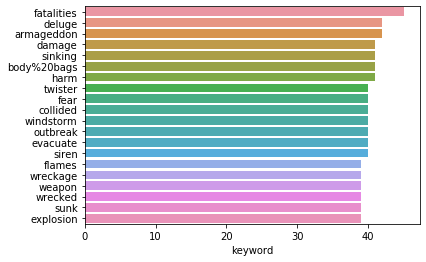

In [16]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],orient='h')

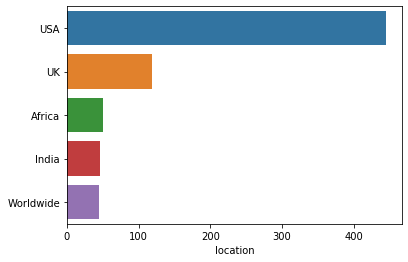

In [17]:
# Replacing the ambigious locations name with Standard names
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

## Data Cleaning

In [18]:
# Applying a first round of text cleaning techniques

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets
train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
train['text'].head()

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    , people receive #wildfires evacuation orders ...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

## Tokennization

In [19]:
text = "Are you coming , aren't you"
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print("Example Text: ",text)
print("------------------------------------------------------------------------------------------------")
print("Tokenization by whitespace:- ",tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer:- ",tokenizer2.tokenize(text))
print("Tokenization by punctuation:- ",tokenizer3.tokenize(text))
print("Tokenization by regular expression:- ",tokenizer4.tokenize(text))

Example Text:  Are you coming , aren't you
------------------------------------------------------------------------------------------------
Tokenization by whitespace:-  ['Are', 'you', 'coming', ',', "aren't", 'you']
Tokenization by words using Treebank Word Tokenizer:-  ['Are', 'you', 'coming', ',', 'are', "n't", 'you']
Tokenization by punctuation:-  ['Are', 'you', 'coming', ',', 'aren', "'", 't', 'you']
Tokenization by regular expression:-  ['Are', 'you', 'coming', 'aren', 't', 'you']


In [20]:
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))
train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

## Stopword Removal 

In [21]:
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words


train['text'] = train['text'].apply(lambda x : remove_stopwords(x))
test['text'] = test['text'].apply(lambda x : remove_stopwords(x))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


## Stemming and Lemmatization

In [22]:
# Stemming and Lemmatization examples
text = "feet cats wolves talked"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

Stemming the sentence:  feet cat wolv talk
Lemmatizing the sentence:  foot cat wolf talked


In [23]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

train['text'] = train['text'].apply(lambda x : combine_text(x))
test['text'] = test['text'].apply(lambda x : combine_text(x))
train['text']
train.head()   

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


## Bag of Words

In [24]:
#  count vectorizer
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train['text'])
test_vectors = count_vectorizer.transform(test["text"])



In [25]:
#Tf-Idf
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(train['text'])
test_tfidf = tfidf.transform(test["text"])

# Building A text classification Model 

## Logistic Regression model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [35]:
#fitting the model to countvectorizer
clf=LogisticRegression(C=1.0)
scores=cross_val_score(clf,train_vectors,train['target'],cv=7,scoring="f1")
scores

array([0.67326733, 0.53546911, 0.53117783, 0.54357798, 0.53640777,
       0.56708861, 0.69652856])

In [36]:
scores.mean()

0.5833595964358862

In [37]:
clf.fit(train_vectors,train['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Fitting a simple Logistic Regression on TFIDF
clf_tfidf = LogisticRegression(C=1.0)
scores = cross_val_score(clf_tfidf, train_tfidf, train["target"], cv=5, scoring="f1")
scores

array([0.55020921, 0.4952919 , 0.5412844 , 0.45369407, 0.65840708])

In [40]:
scores.mean()

0.5397773318173372

It appears the countvectorizer gives a better performance than TFIDF in this case.

## Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
# Fitting a simple Naive Bayes on Counts
clf_NB=MultinomialNB()
scores=cross_val_score(clf_NB,train_vectors,train['target'],cv=5,scoring="f1")
scores

array([0.63036304, 0.60558339, 0.68506723, 0.64230171, 0.72413793])

In [44]:
scores.mean()

0.6574906607783926

In [45]:
clf_NB.fit(train_vectors,train["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
# Fitting a simple Naive Bayes on TFIDF
clf_NB_TFIDF = MultinomialNB()
scores =cross_val_score(clf_NB_TFIDF, train_tfidf, train["target"], cv=5, scoring="f1")
scores

array([0.5884653 , 0.57420495, 0.60952381, 0.58495822, 0.74647887])

In [48]:
scores.mean()

0.620726229034525

In [49]:
clf_NB_TFIDF.fit(train_tfidf, train["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Ridge Classifier

In [76]:
from sklearn.linear_model import RidgeClassifier
clf_RC = RidgeClassifier()

In [77]:
scores = cross_val_score(clf_RC, train_vectors, train["target"], cv=3, scoring="f1")
scores

array([0.59514825, 0.53984064, 0.629     ])

In [78]:
scores.mean()

0.5879962951428787

In [79]:
clf_RC.fit(train_vectors, train["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

## Making the submission

In [80]:
sample_submission=pd.read_csv(r"C:\Users\prasanna\Desktop\NLP with disaster\sample_submission.csv")

In [81]:
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [82]:
sample_submission['target']=clf_NB.predict(test_vectors)

In [85]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [86]:
sample_submission.to_csv("Nlp_Tweet_Disaster_submission.csv", index=False)